Discrete distribution - one that associates positive probability with discrete outcomes. We will often want to model the distribution through a continuum of outcomes. (For our purposes, these results will always be real numbers, although in real life this is not always the case.) For example, a uniform distribution puts equal weight on all numbers between 0 and 1.

Since there are an infinite number of numbers between 0 and 1, this means that the weight assigned to individual numbers must necessarily be equal to zero.

For this reason, we represent a continuous distribution with a probability density function (pdf), so that the probability of seeing a value in a given interval is equal to the density integral of the function during the interval.

If your integral calculus is rusty, a simpler way to understand it is that if the distribution has a density function f, then the probability of a value occurring between k and k + x is approximately x * f (k) if x is small.


In [1]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [2]:
uniform_pdf(0)

1

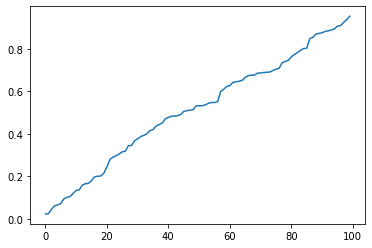

In [3]:
#plot a sorted uniform distribution for 100 events
import numpy
import matplotlib.pyplot as plt
array = numpy.random.uniform(low=0,high=1,size=100)
array.sort()
plt.plot(array)
plt.show()

The random.random () function returns a random variable with a uniform distribution

In [4]:
import numpy as np

In [5]:
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

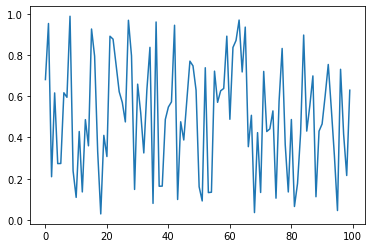

In [6]:
x=np.random.rand(100)
plt.plot(x)

In [7]:
x.mean()

0.5055956566312586

In [8]:
x.std()

0.2712336697685044

Normal Distribution

In [9]:
import math
from math import exp, expm1, sqrt, pi

In [10]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

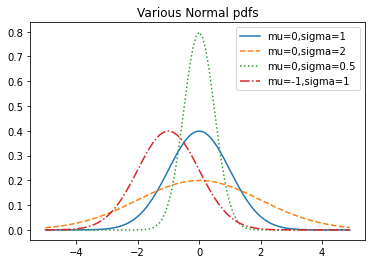

In [11]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [12]:
from math import erf

In [13]:
#Kumulativna funckija distribucije
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

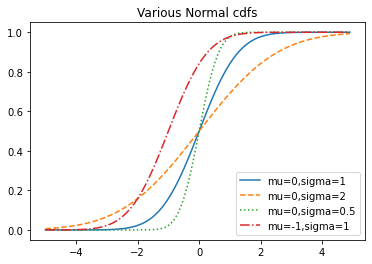

In [14]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

Sometimes we will have to turn to the cumulus distribution function (normal_cdf) to find a value that corresponds to a certain probability. There is no easy way to calculate the inversion of a cumulative function, but normal_cdf is continuous and strictly increasing, so we can use binary search:

In [15]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.01):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
# midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

In [16]:
#Ova funkcija vraća standardizovani skor za određenu zadatu verovatnoću
inverse_normal_cdf(0.95)

1.650390625

### Central boundary theorem

One of the reasons that a normal distribution is so useful is the central boundary theorem, which says (essentially) that a random variable is defined as the average of a large number of independent and identically distributed random variables itself normally distributed. This means that a large number of independent random events expressed through a random variable p spontaneously take the form of a bell-shaped, normal distribution.
Specifically, if k1, ..., kn are random variables with average m and standard deviation s,
and if n is large, then:

1 / n (k1 + ... + kn)

it is approximately normally distributed with mean µ and standard deviation s / n.
Equivalent (but often more useful),
(k1 + ... + kn) - mn) / s sqrt (n)

is approximately normally distributed with arithmetic mean 0 and standard deviation 1.

An easy way to illustrate this is to look at the binomial random variables they have
two parameters n and p. The binomial random variable with these two parameters (n, p) is simply the sum of all n independent Bernoulli (p) random variables, each of which is equal to 1 with probability p and 0 with probability 1 - p:

In [17]:
import random

In [18]:
#function gives a random number from 0 to 1, according to a uniform distribution

In [19]:
from random import random

In [20]:
def bernoulli_trial(p):
    if random() < p:
        return 1
    else: 
        return 0

In [21]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

The mean value of the Bernoulli (p) variable is p, and its standard deviation is sqrt (p (1 - p)). The central boundary theorem says that as n becomes very large, the binomial (n, p) variable is an approximately normal random variable with arithmetic mean m = np and standard deviation s = sqrt (np (1 - p)). If we draw both, you can easily see the similarity:

In [22]:
import collections
from collections import Counter

In [23]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()], [v / num_points for v in histogram.values()], 0.8, color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
# use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
        for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

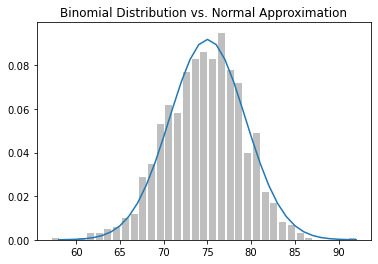

In [24]:
make_hist(0.75, 100, 1000)

The motive for this approximation is: if we want to know what is the probability that a coin will appear more than 60 heads in 100 throws,
you can estimate this as the probability that Normal (50.5) is greater than 60, which is easier than calculating the binomial (100.0.5) cdf.
Although in most applications we probably use statistics that the software easily calculates
for all the probabilities we want.

In [25]:
data = [binomial(10, 3) for _ in range(10)]
data

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

## The gamma distribution

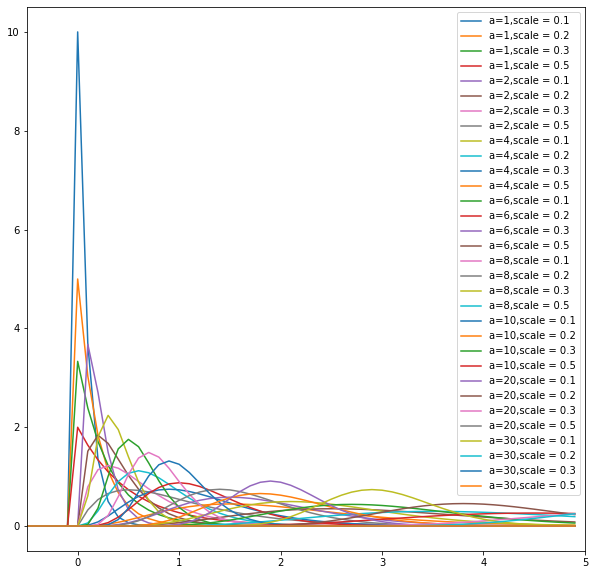

In [32]:
import scipy.stats as stats 

xs = [x / 10.0 for x in range(-50, 50)]
alphas = [1,2,4,6,8,10,20,30]
scale = [0.1, 0.2, 0.3, 0.5]
plt.figure(figsize=(10,10))
plt.xlim(-0.5,5)
for a in alphas:
    for s in scale:
        y1 = stats.gamma.pdf(xs, a=a, scale=s)
        plt.plot(xs, y1,'-',label= f'a={a},scale = {s}')
        plt.legend();